# Credit Card Users Churn Prediction Study

## Aim:

We have been tasked to provide a concise analysis of the dataset given and create a classification model that predicts if a customer is going to stop using card services for Thera Bank or not.

## Attribute Information:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

## Importing Necessary Libraries such as pandas, numpy, matplotlib.pyplot, seaborn

In [99]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

## Reading the data from an .xlsx file

In [1]:
#read xlsx into a dataframe called 'data' and read the second sheet
churner_data = pd.read_csv('C:/Users/zeezu/Desktop/Python Coding/csv/BankChurners.csv')

NameError: name 'pd' is not defined

In [3]:
#copying the data frame into a new data frame to retain original data.
df = pd.DataFrame(churner_data)

## Checking first 5 rows and 10 random rows to get a nice overview

In [4]:
#Checking the first 10 rows of the dataset
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 8 random rows
# I'm setting the random seed via np.random.seed so that I get the same random results every time
np.random.seed(1)
df.sample(10)

There are 10127 rows and 21 columns.


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6498,712389108,Existing Customer,43,F,2,Graduate,Married,Less than $40K,Blue,36,...,3,2,2570.0,2107,463.0,0.651,4058,83,0.766,0.820
9013,718388733,Existing Customer,38,F,1,College,Unknown,Less than $40K,Blue,32,...,3,3,2609.0,1259,1350.0,0.871,8677,96,0.627,0.483
2053,710109633,Existing Customer,39,M,2,College,Married,$60K - $80K,Blue,31,...,3,2,9871.0,1061,8810.0,0.545,1683,34,0.478,0.107
3211,717331758,Existing Customer,44,M,4,Graduate,Married,$120K +,Blue,32,...,3,4,34516.0,2517,31999.0,0.765,4228,83,0.596,0.073
5559,709460883,Attrited Customer,38,F,2,Doctorate,Married,Less than $40K,Blue,28,...,2,4,1614.0,0,1614.0,0.609,2437,46,0.438,0.000
6106,789105183,Existing Customer,54,M,3,Post-Graduate,Single,$80K - $120K,Silver,42,...,1,2,34516.0,2488,32028.0,0.552,4401,87,0.776,0.072
4150,771342183,Attrited Customer,53,F,3,Graduate,Single,$40K - $60K,Blue,40,...,3,2,1625.0,0,1625.0,0.689,2314,43,0.433,0.000
2205,708174708,Existing Customer,38,M,4,Graduate,Married,$40K - $60K,Blue,27,...,2,4,5535.0,1276,4259.0,0.636,1764,38,0.900,0.231
4145,718076733,Existing Customer,43,M,1,Graduate,Single,$60K - $80K,Silver,31,...,3,3,25824.0,1170,24654.0,0.684,3101,73,0.780,0.045
5324,821889858,Attrited Customer,50,F,1,Doctorate,Single,Unknown,Blue,46,...,4,3,1970.0,1477,493.0,0.662,2493,44,0.571,0.750


### Observations

* The data has 21 columns. It looks like there are some unkown values present in the dataset that we might have to take a closer look at.
* The `Income_Category` column needs to be treated and looked at also.
* We have a couple of categorical variables such as `Gender`, `Education_Level` etc.
* Our dependent variable is `Attrition_Flag`

## Checking the info of the dataset

In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Observations

* There are three data types represented across all columns: float64, int64 and object.
* The columns that are of the type object need to be changed to categorical types.


## Checking a description of the data

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127,NaN,NaN,NaN,7.39178e+08,3.69038e+07,7.08082e+08,7.13037e+08,7.17926e+08,7.73144e+08,8.28343e+08
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127,NaN,NaN,NaN,46.326,8.01681,26,41,46,52,73
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127,NaN,NaN,NaN,2.3462,1.29891,0,1,2,3,5
Education_Level,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127,NaN,NaN,NaN,35.9284,7.98642,13,31,36,40,56


### Observations

* `Education_Level` has 7 unique variables, most frequent being''Graduate.
* `Gender` has 2 unique variables, with the most frequent being 'F' standing for 'Female'.
* Looking at the `Customer_Age` column, the average customer age seems to be around 46 years of age.

# Data Preprocessing

### Checking for missing values

In [8]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
df.isnull().any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

* There are no apparent missing values, but we might have to perform further checks to confirm this.

### Checking unique values of every column

In [10]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [11]:
df.describe(include ='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


### Let's check unique values for the categorical variables

In [12]:
df.describe(include ='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [13]:
#Creating a dataframe containing the categorical variables
cat_cols = pd.DataFrame()

for cols in df.columns:
    if df[cols].dtype == "object":
        cat_cols[cols] = df[cols]
        
cat_cols.head(10)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
5,Existing Customer,M,Graduate,Married,$40K - $60K,Blue
6,Existing Customer,M,Unknown,Married,$120K +,Gold
7,Existing Customer,M,High School,Unknown,$60K - $80K,Silver
8,Existing Customer,M,Uneducated,Single,$60K - $80K,Blue
9,Existing Customer,M,Graduate,Single,$80K - $120K,Blue


In [14]:
for val in cat_cols.columns:
    print(f'{(cat_cols[val].value_counts())}')
    print(f'Number of unique values: {(cat_cols[val].value_counts().count())}\n')

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
Number of unique values: 2

F    5358
M    4769
Name: Gender, dtype: int64
Number of unique values: 2

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Number of unique values: 7

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Number of unique values: 4

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Number of unique values: 6

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
Number of unique values: 4



* The `Income_Category` variable has 6 unique variables, one of which is 'Unknown'. This shall have to be looked at.
* The `Marital_Status` variable also has unknown values.

# Exploratory Data Analysis

## Univariate analysis

In [15]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(feature.mean(), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(feature.median(), color='black', linestyle='-') # Add median to the histogram

### Let's explore the variable `Customer_Age`

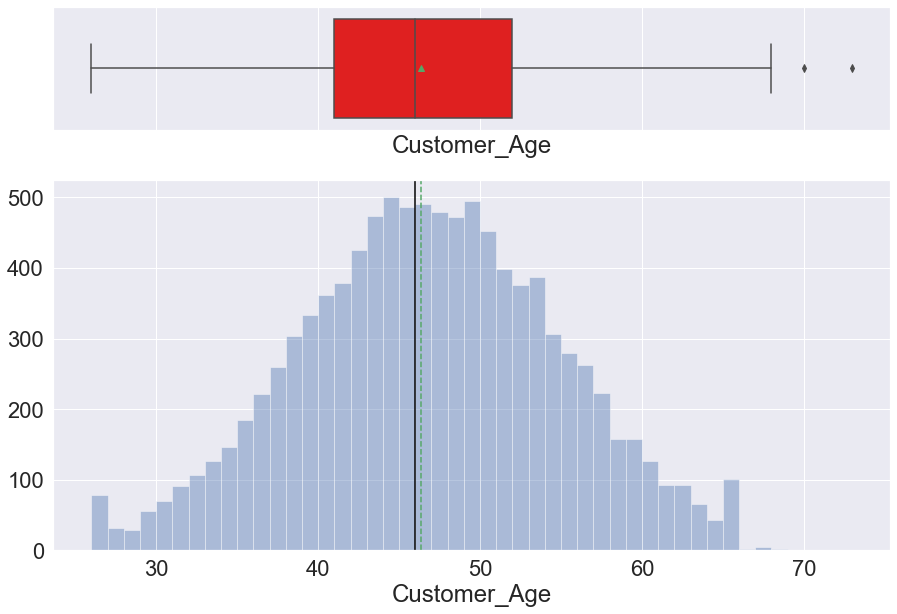

In [17]:
histogram_boxplot(df.Customer_Age);

* This variable follows a normal distribution, we can see very few outliers to the left indicating a few customers are above the age of 70.

### Let's explore the variable `Credit_Limit`

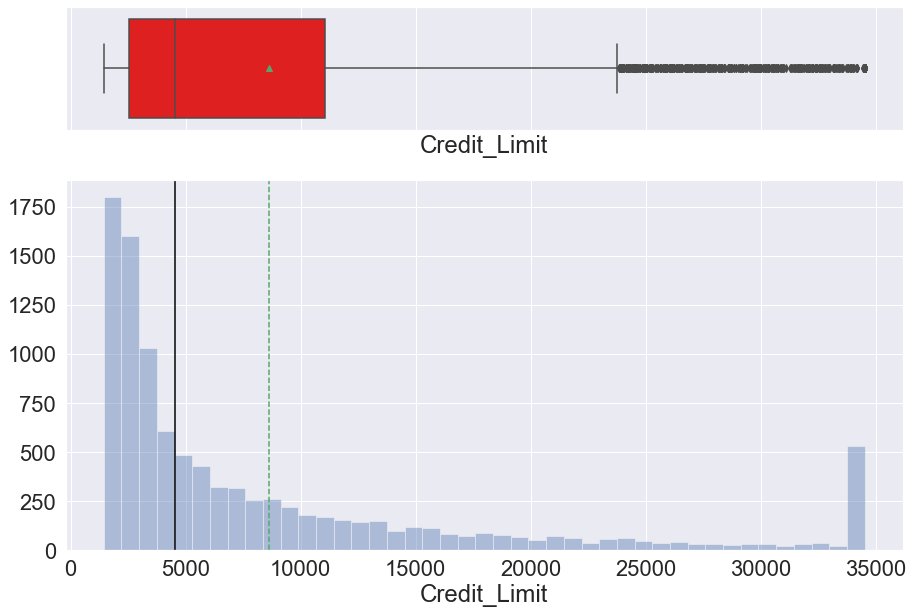

In [20]:
histogram_boxplot(df.Credit_Limit);

* This is heavily right skewed, with a heavy presence of outliers towards the right sight of the graph

### Let's explore the variable `Total_Trans_Ct`

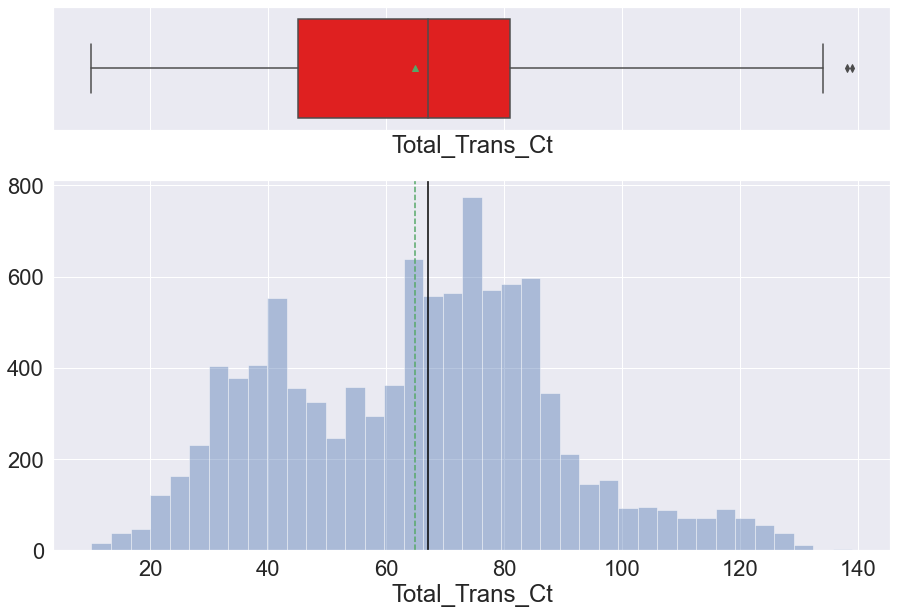

In [21]:
histogram_boxplot(df.Total_Trans_Ct);

* This almost follows a normal distribution, where we have very few outliers to the right.
* The mean and median of the distribution are quite close indicating no extreme skewness.

### Let's explore the variable `Total_Revolving_Bal`

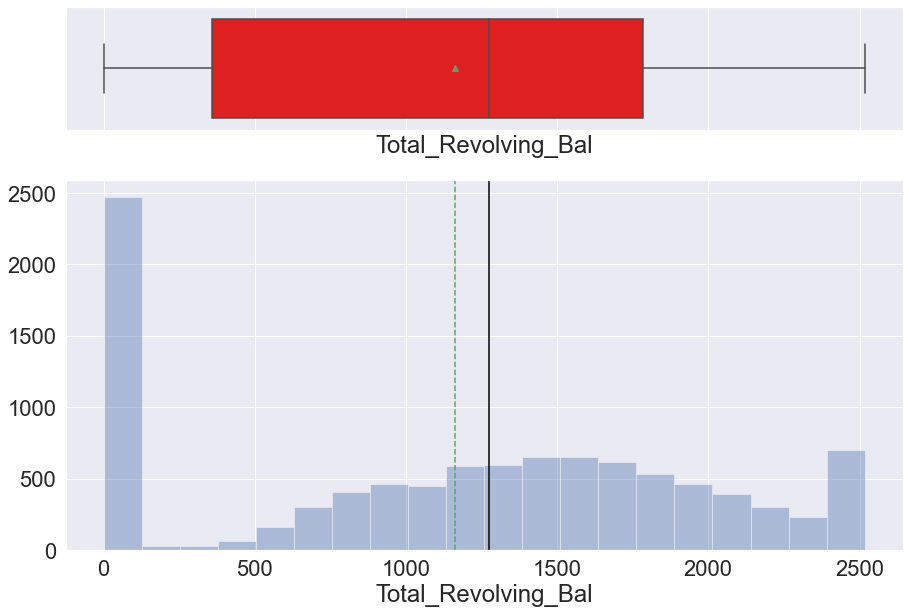

In [23]:
histogram_boxplot(df.Total_Revolving_Bal);

* This variable is left skewed, where we see a high number of zeros present indicating a lot of customers have a revolving balance of 0.

### Let's explore the variable `Total_Ct_Chng_Q4_Q1`

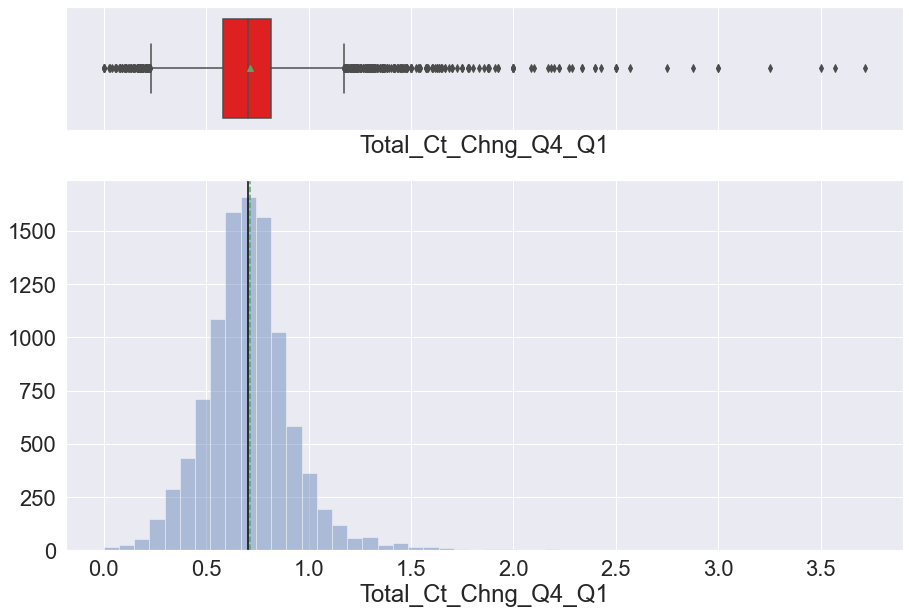

In [25]:
histogram_boxplot(df.Total_Ct_Chng_Q4_Q1);

* This variable follows a normal distribution, but we can see numerous outliers on both sides of the distribution.

## Let's take a look at our dependent variable `Attrition_Flag`

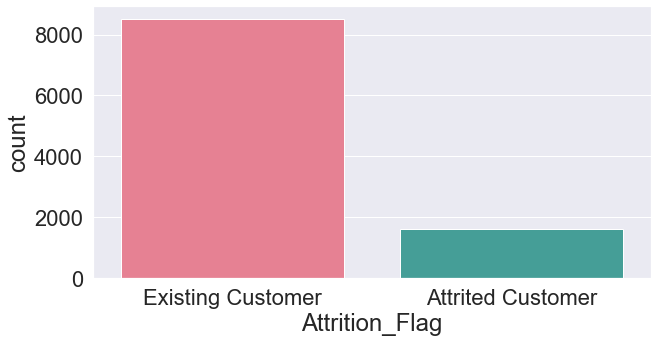

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df['Attrition_Flag'], palette='husl');

* This shows that most customers are still with the bank, seeing as Existing Customers has a high count.

## Let's take a look at  `Education_Level`

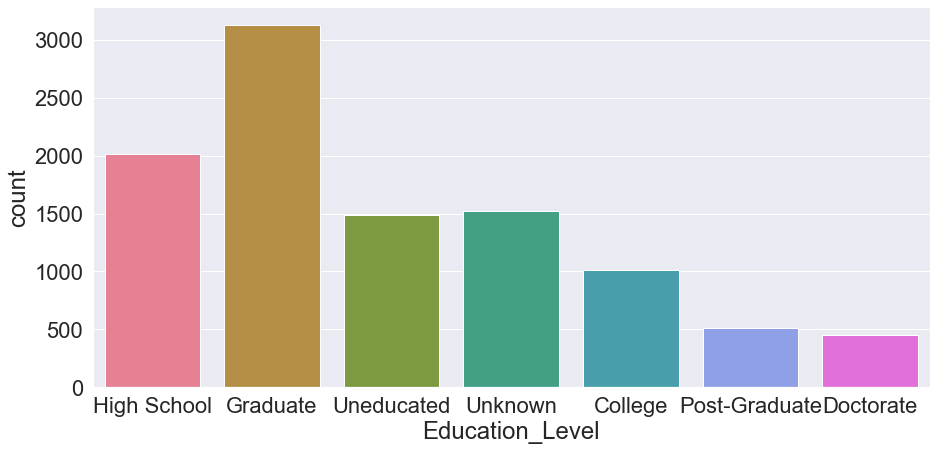

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(df['Education_Level'], palette='husl');

* This shows that most customers in our dataset have graduated, followed by those in high school.

## Let's take a look at `Income_Category`

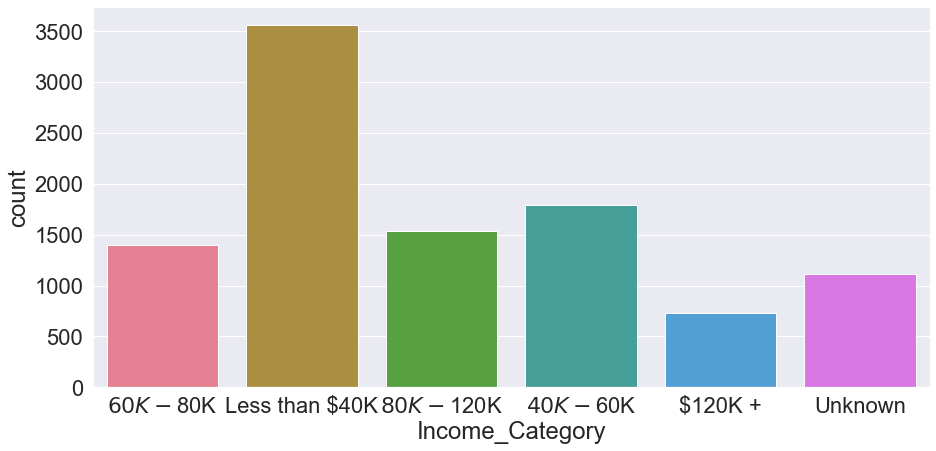

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(df['Income_Category'], palette='husl');

* This shows that most customers earn less than 40,000 dollars, with fewer customers earning over a 120K dollars.

### Taking a look at the rest of the categorical variables

In [29]:
df.describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


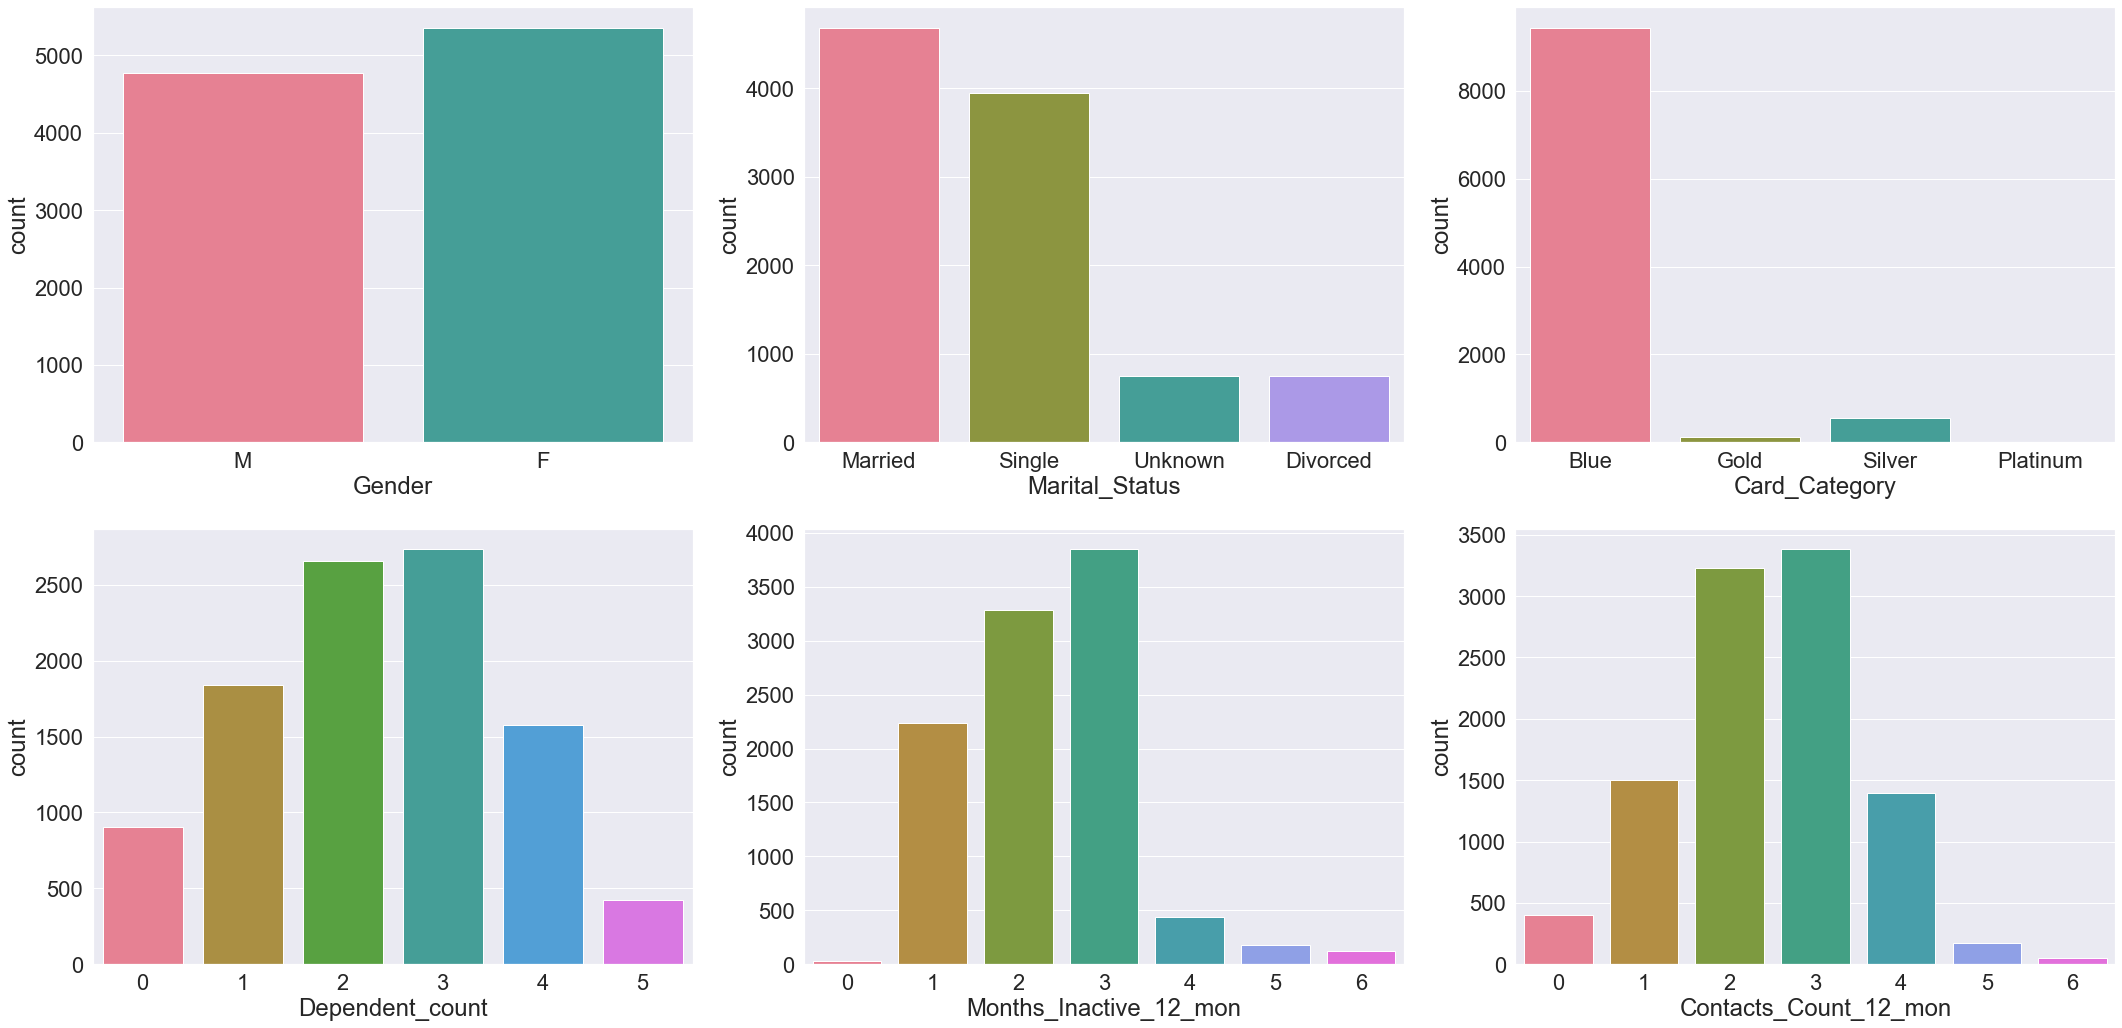

In [30]:
#Let's explore the categorical columns

cat_cols = ['Gender', 'Marital_Status', 'Card_Category', 'Dependent_count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

plt.figure(figsize=(30,130))

for i in range(len(cat_cols)):
    plt.subplot(18,3,i+1)
    sns.countplot(df[cat_cols[i]],palette='husl')
    plt.tight_layout()

plt.show()

#### Observations

* `Gender` indicates that there are more females than males in our dataset.

* `Marital_Status` shows is that most customers are either married or single with very few of them being divorced.

* The `Card_Category` chart shows that most customers have a blue card, with almost no customers having a Platinum card.

* A lot of our customers have between 2-3 dependents.

* Also a majority of our customers have been inactive for about 2-3 months in the past year.

* A majority of our customers have also made contact with the bank about 2-3 times in the past 12 months.  

* All unknown values shall have to be treated accordingly.

## Bivariate Analysis

We shall plot some graphs that shall help us take a look and understand some of the interactions between the numerous variables 

### Correlation

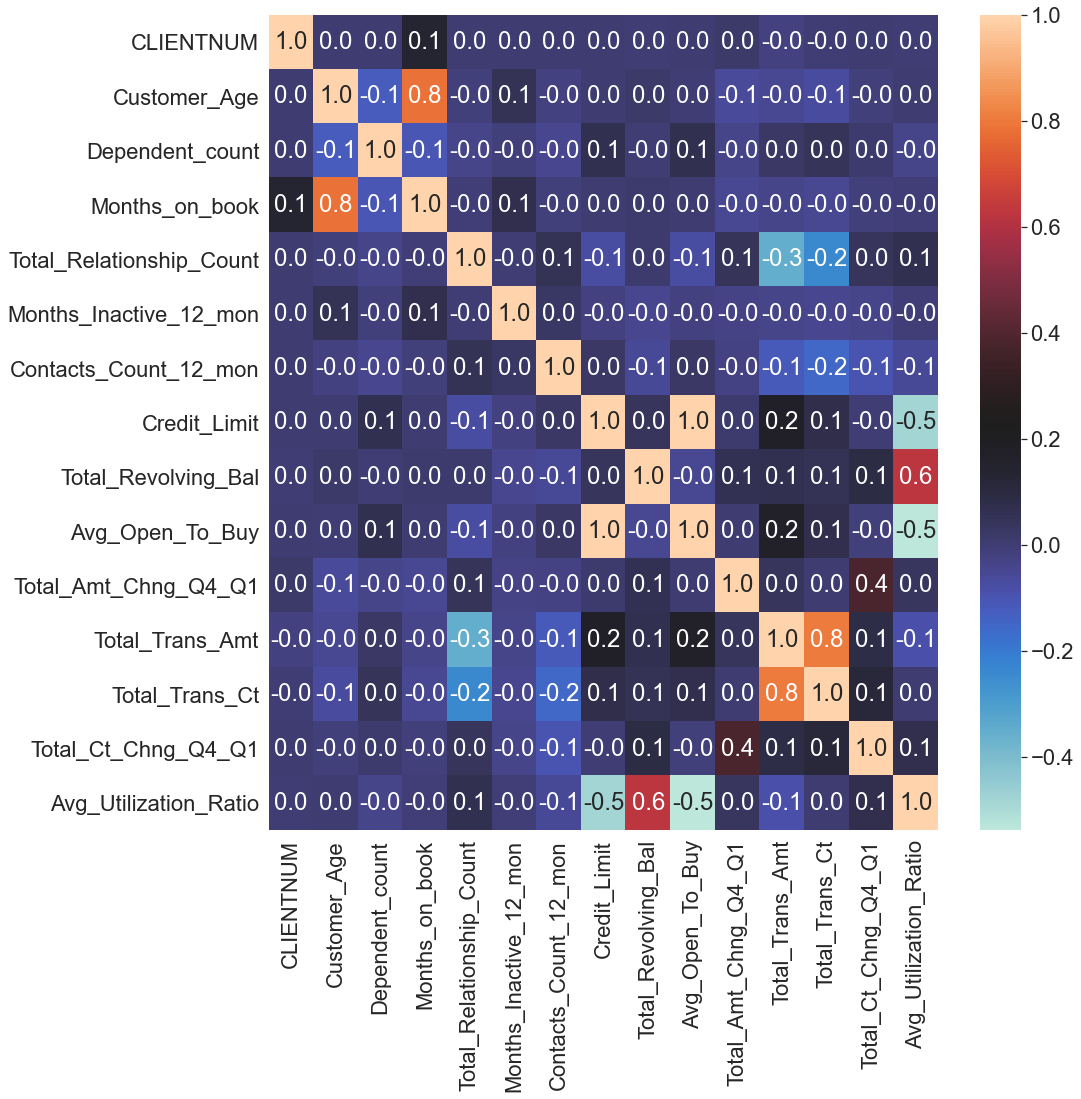

In [31]:
#We shall use a heat map to check the correlation between numerical variables

fig,ax = plt.subplots(figsize=(15,15));

sns.heatmap(df.corr(),ax=ax,annot=True, cmap='icefire', fmt='.1f');

### Observations

* We can see multiple variables that are highly correlated that we shall have to drop.
* `Months_on_book` is highly correlated with `Customer_Age` so that column can be dropped.
* `Avg_Open_To_Buy` is also highly correlated with `Credit_Limit`, so that shall be dropped too.
* Same goes for thr high correlation between `Total_CT_Chng_Q4_Q1` and `Total_Revolving_Bal` so the first variable shall be dropped.

## Let's look at regression plots of variables with some positive correlation 

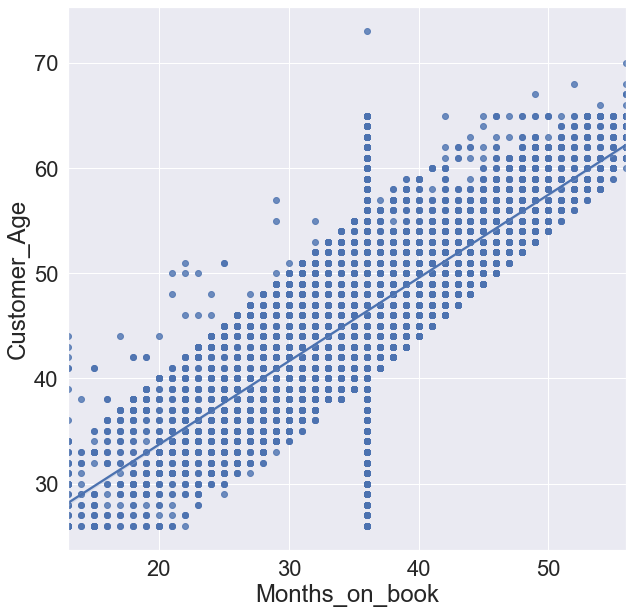

In [32]:
#We can create a regression plot that shall draw a regression line--
#--through the scatter plot to help us visualize the positive correlation

plt.figure(figsize=(10,10))
sns.regplot(x='Months_on_book',y='Customer_Age', data=df);

* This confirms the postive correlation between these two variables which we saw earlier from the correlation plot.
* It may be indicating that the older a customer is, the longer they've been with the bank.
* `Months_on_book` shall be dropped.

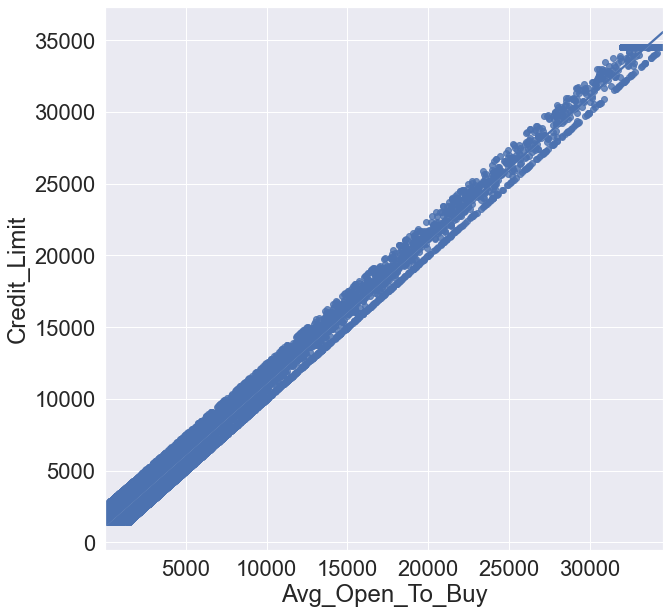

In [33]:
plt.figure(figsize=(10,10))

#Plotting a regression plot with NumberOfChildrenVisiting on the x-axis and NumberOfPersonVisiting on the y-axis
sns.regplot(x='Avg_Open_To_Buy',y='Credit_Limit', data=df);

* This shows very high positive correlation so one of the variables shall be dropped also.

## Let's look at variables put against the `Attrition_Flag` variable

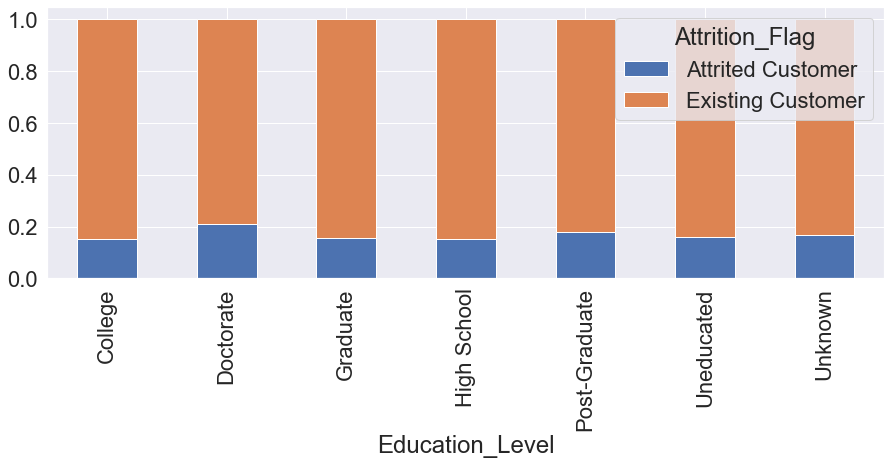

In [34]:
fig,ax = plt.subplots(figsize=(15,5));

npv=pd.crosstab(df['Education_Level'],df['Attrition_Flag']);
npv.div(npv.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, ax=ax);

* This graph shows us that attrition is higher with cutomers who have attained a doctorate or post graduate degree.

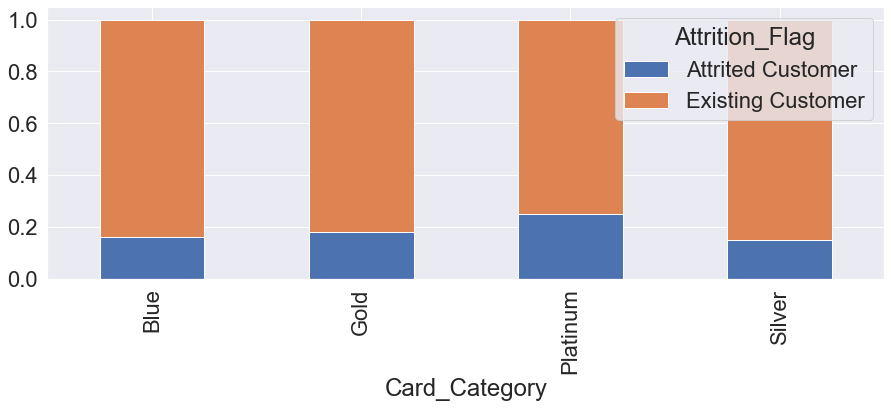

In [35]:
fig,ax = plt.subplots(figsize=(15,5));

npv=pd.crosstab(df['Card_Category'],df['Attrition_Flag']);
npv.div(npv.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, ax=ax);

* This shows that attrition may also be higher with customers who are platinum card owners over other card owners.

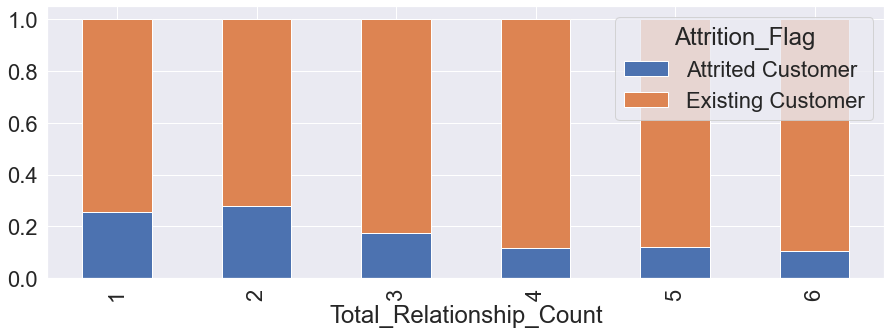

In [36]:
fig,ax = plt.subplots(figsize=(15,5));

npv=pd.crosstab(df['Total_Relationship_Count'],df['Attrition_Flag']);
npv.div(npv.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, ax=ax);

* This may indicate that customers who own 2 products have a higher tendency to attrite than others. 

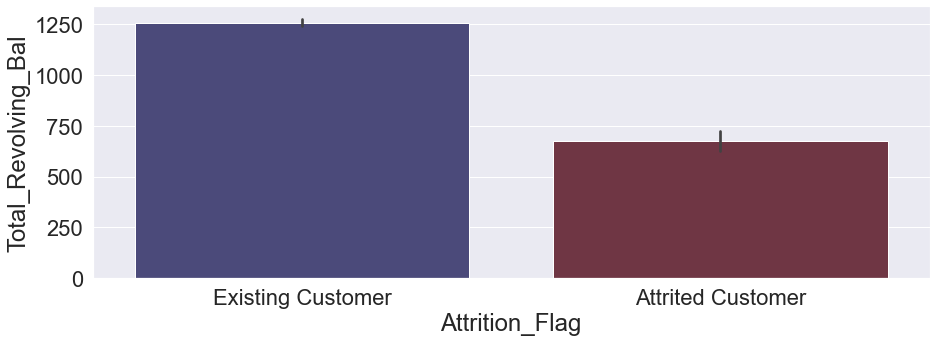

In [37]:
#Bar plot with Attrition_Flag on the x-axis and Total_Revolving_Bal on the y-axis
plt.figure(figsize=(15,5))
sns.barplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=df, palette='icefire');

* Customers who have higher revolving balance seem to stay more than customers who have lower revolving balances.

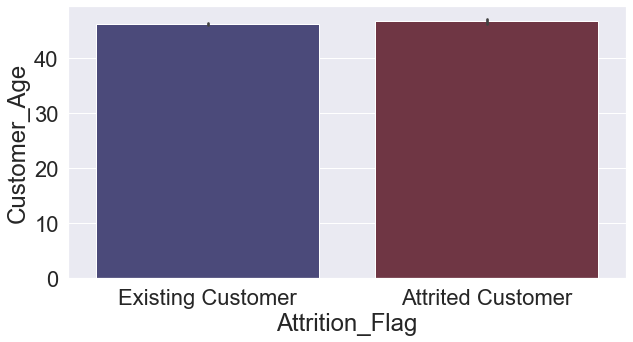

In [38]:
#Bar plot with Attrition_Flag on the x-axis and Customer_Age on the y-axis
plt.figure(figsize=(10,5))
sns.barplot(x='Attrition_Flag', y='Customer_Age', data=df, palette='icefire');

* This may be siginifying that age does not really factor into whether a customer attrited or not.

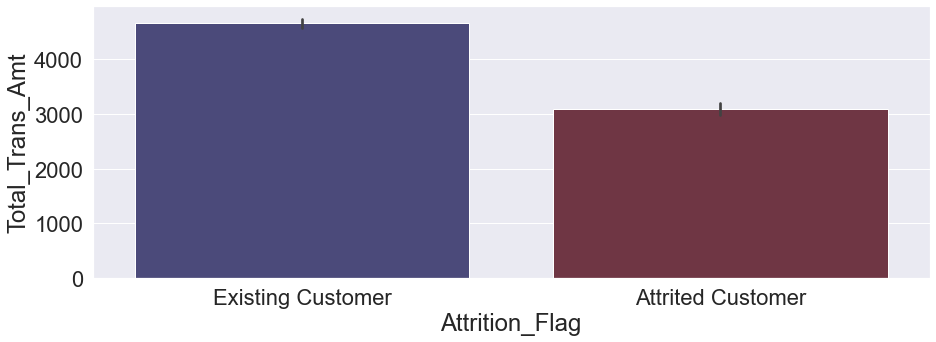

In [39]:
#Bar plot with Attrition_Flag on the x-axis and Total_Trans_Amt on the y-axis
plt.figure(figsize=(15,5))
sns.barplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df, palette='icefire');

* Customers with lower transaction amounts seem to attrite more than those with higher amounts.

# Data Preparation

### Dropping Unwanted Variables

In [40]:
#Dropping the ID column seeing as it adds no value to our model
df.drop(['CLIENTNUM'],axis=1,inplace=True)

### Fixing the categorical types

Asides from the variables of type 'object', there are some other variables we shall also convert to categorical such as `Dependent_count`, `Total_Relationship_Count` etc.

In [41]:
#Changing the types from object to categorical

for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# convert object to category
        
#Converting other variables that can also be categorical
conv_cat_cols = df[['Total_Relationship_Count', 'Dependent_count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']]

for i in conv_cat_cols.columns:
    df[i] = df[i].astype('category')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

### Dealing with Outliers

For this dataset, I feel the outliers present provide valuable information so therefore I shall not be treating them. 

## Missing Value Detection and Treatment

We shall have to treat the unknown values we saw preivously in a couple of vairables as missing values.
To impute those missing values, we shall be using KNN imputer which replaces using the average of k nearest non-missing feature values.

In [44]:
df = df.replace({'Unknown': None})
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

We can see there are now missing values present in `Education_Level`, `Marital_Status` and `Income_Category`

In [45]:
#Create imputer
imputer = KNNImputer(n_neighbors=5)

In [46]:
#Columns to be imputed
impute_cols = ['Education_Level', 'Marital_Status', 'Income_Category']

In [47]:
#Creating new dataframe to avoid errors
dt = pd.DataFrame(df)

In [48]:
#Passing numerical values for each column for KNN imputation
Education_Level = {'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,'Doctorate':5}
dt['Education_Level'] = dt['Education_Level'].map(Education_Level).astype('Int32')

Marital_Status = {'Single':0,'Married':1,'Divorced': 2}
dt['Marital_Status'] = dt['Marital_Status'].map(Marital_Status).astype('Int32')

Income_Category= {'Less than $40K':0, '$40K - $60K':1,'$60K - $80K':2,'$80K - $120K':3, '$120K +':4}  
dt['Income_Category'] = dt['Income_Category'].map(Income_Category).astype('Int32')

In [49]:
#Checking if values have been properly encoded 
dt.head(6)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,1,1,2,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,3,0,0,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,3,1,3,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,1,<NA>,0,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,0,1,2,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,3,1,1,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [50]:
#Converting the attrition values to numerical
dt['Attrition_Flag'] = dt.Attrition_Flag.replace(to_replace=['Existing Customer', 'Attrited Customer'], value=[0, 1])

## Splitting The Dataset

In [51]:
# Separating target variable and other variables
X = dt.drop(['Attrition_Flag'],axis=1)
y = dt['Attrition_Flag']

In [52]:
# Dropping birth year and Dt_Customer columns
X.drop(
    columns=[
        "Months_on_book",
        "Avg_Open_To_Buy",
        "Total_Ct_Chng_Q4_Q1",
    ],
    inplace=True,
)

In [53]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 16) (3039, 16)


## Replacing Missing Values with KNN Imputer

In [54]:
#Fit and transform the train data
X_train[impute_cols]=imputer.fit_transform(X_train[impute_cols])

#Transform the test data 
X_test[impute_cols]=imputer.transform(X_test[impute_cols])

In [55]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio     

In [56]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')
    
#Inversing encoding for selected columns    
inverse_mapping(Education_Level,'Education_Level')
inverse_mapping(Marital_Status,'Marital_Status')
inverse_mapping(Income_Category,'Income_Category')

In [57]:
#Checking if values have been inversed
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
2    1877
3    1875
1    1286
4    1102
0     637
5     311
Name: Dependent_count, dtype: int64
******************************
Graduate         2525
High School      1601
College          1255
Uneducated       1031
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3687
Single      2899
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2599
$40K - $60K       1744
$60K - $80K       1149
$80K - $120K      1093
$120K +            503
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************
3    1606
4    1356
6    1329
5    1305
2     851
1     641
Name: Total_Relationship_Count, dtype: int64
******************************
3    2680
2    2292
1    156

In [58]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
2    1877
3    1875
1    1286
4    1102
0     637
5     311
Name: Dependent_count, dtype: int64
******************************
Graduate         2525
High School      1601
College          1255
Uneducated       1031
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3687
Single      2899
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2599
$40K - $60K       1744
$60K - $80K       1149
$80K - $120K      1093
$120K +            503
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************
3    1606
4    1356
6    1329
5    1305
2     851
1     641
Name: Total_Relationship_Count, dtype: int64
******************************
3    2680
2    2292
1    156

## Encoding Categorical Variables

In [59]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 44) (3039, 44)


We have 44 columns after encoding.

# Building our models

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will stop using credit card services but does not 
2. Predicting a customer will not stop using credit card services but does

#### Which case is more important? 
* Predicting that customer will not stop using the services but they end up stopping i.e. losing a potential source of revenue for the company because that customer will not be targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.
* Therefore Recall is the metric we are going to be focusing on for our models going forth.

**Before building the model, let's create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.**

In [60]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [84]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores


### Breakdown of model building

**1. We shall first see how a logistic regression model does with our data, trying to improve performance by upsampling and downsampling the data and regularizing the model if needed.**

**2. Then we shall also see how other models do such as decision trees, random forest, bagging classifier models and boosting models.**

**3. Finally, we shall use hyperparameters tuning using both grid search and random search to figure out which are the best models.**

## Logistic Regression

In [62]:
#fit model on train set
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train);

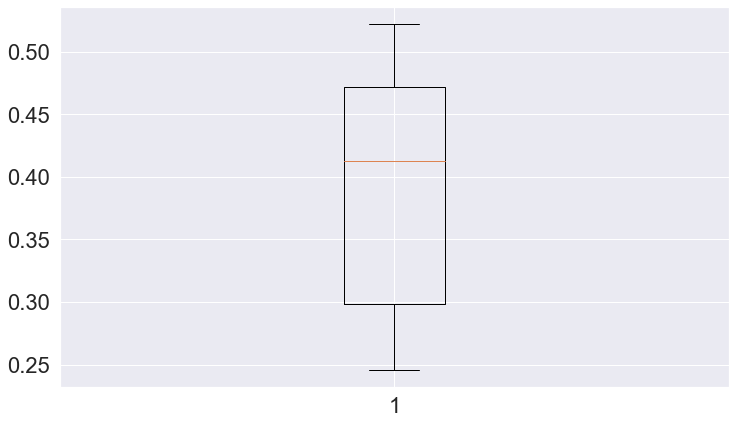

In [63]:
#Evaluating model using K-fold and CV score
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)#Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(12,7))
plt.boxplot(cv_result_bfr)
plt.show()

The boxplot above shows performance for the model on the train set is between 0.25-0.55

Accuracy on training set :  0.8855812641083521
Accuracy on test set :  0.8802237578150708
Recall on training set :  0.46005267778753295
Recall on test set :  0.45286885245901637
Precision on training set :  0.7277777777777777
Precision on test set :  0.6949685534591195


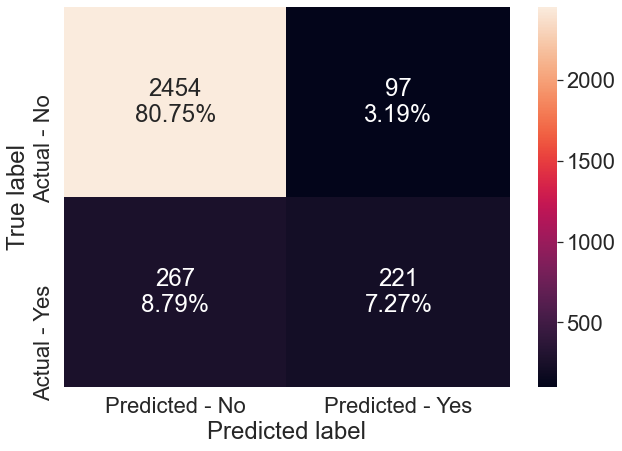

In [86]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

* The results above look decent, seeing as there's barely any overfitting on any of the metrics, although our Recall score is low so we shall try Upsampling on the train data using SMOTE to try to improve model performance.

## Oversampling the train data Using SMOTE

In [70]:
print("Before UpSampling, counts of label 'Attrited Customer': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'ExistIng Customer': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label 'Attrited Customer': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'ExistIng Customer': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Attrited Customer': 1139
Before UpSampling, counts of label 'ExistIng Customer': 5949 

After UpSampling, counts of label 'Attrited Customer': 5949
After UpSampling, counts of label 'ExistIng Customer': 5949 

After UpSampling, the shape of train_X: (11898, 44)
After UpSampling, the shape of train_y: (11898,) 



## Logistic Regression with Oversampled data

In [71]:
lr_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
lr_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

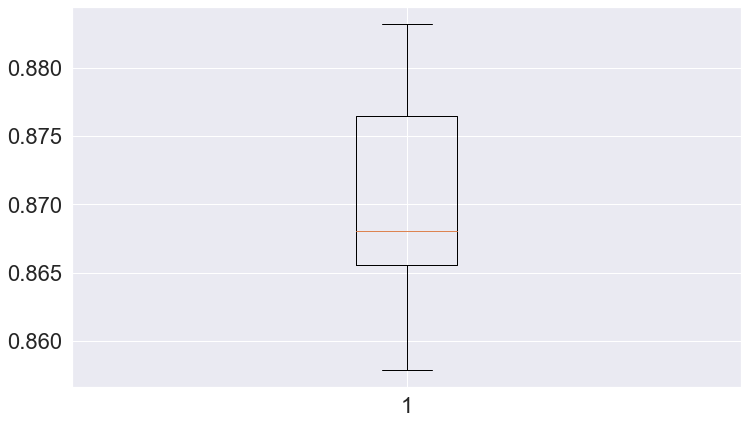

In [74]:
#Model performance using K-fold and CV score
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=lr_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(12,7))
plt.boxplot(cv_result_over)
plt.show()

We can see the performance has drastically improved to between 0.85-0.89 on the training set.

Accuracy on training set :  0.8895612708018155
Accuracy on test set :  0.8275748601513656
Recall on training set :  0.87359220036981
Recall on test set :  0.4774590163934426
Precision on training set :  0.9024136134745615
Precision on test set :  0.4641434262948207


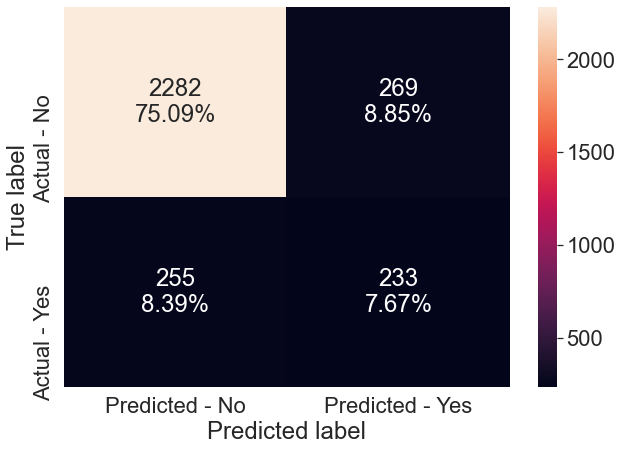

In [87]:
#Calculating different metrics
get_metrics_score(lr_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_over,y_test)

* Our model is is now overfitting the data, even though we saw improvements in train set, the model does really poorly on test set.

We shall try undersampling to see if that shall give us better results, but before that let us try to regurlarize the model and see if we can get better results by trying to reduce overfitting.

## Regularization

In [89]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7122205412674399
Accuracy on test set :  0.7890753537347812
Recall on training set :  0.5809379727685325
Recall on test set :  0.5307377049180327
Precision on training set :  0.7877820834283109
Precision on test set :  0.3859910581222057


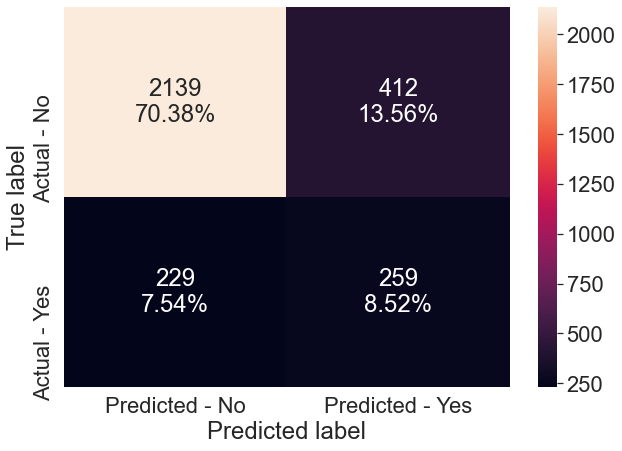

In [90]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

Our model is generalizing much better, it is not overfitting as much as before on recall , which is much better than the previous results.

## Undersampling the train data Using SMOTE

In [78]:
#Defining our undersampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Attrited Customer': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'Existing Customer': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Attrited Customer': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'Existing Customer': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Attrited Customer': 1139
Before Under Sampling, counts of label 'Existing Customer': 5949 

After Under Sampling, counts of label 'Attrited Customer': 1139
After Under Sampling, counts of label 'Existing Customer': 1139 

After Under Sampling, the shape of train_X: (2278, 44)
After Under Sampling, the shape of train_y: (2278,) 



## Logistic Regression with Oversampled data

In [80]:
lr_under = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
lr_under.fit(X_train_un,y_train_un)

LogisticRegression(random_state=1)

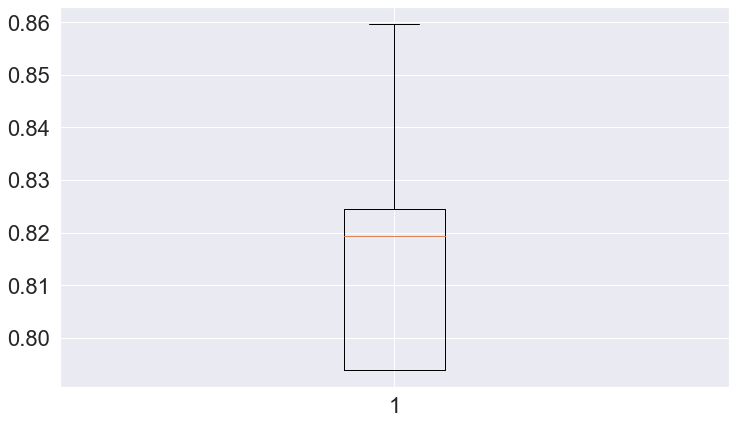

In [82]:
#Model performance using K-fold and CV score
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=lr_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(12,7))
plt.boxplot(cv_result_under)
plt.show()

We can see the performance for the model on the undersampled data is between 0.78-0.86 on the training set.

Accuracy on training set :  0.8086040386303776
Accuracy on test set :  0.801250411319513
Recall on training set :  0.8094820017559262
Recall on test set :  0.8032786885245902
Precision on training set :  0.8080631025416302
Precision on test set :  0.43555555555555553


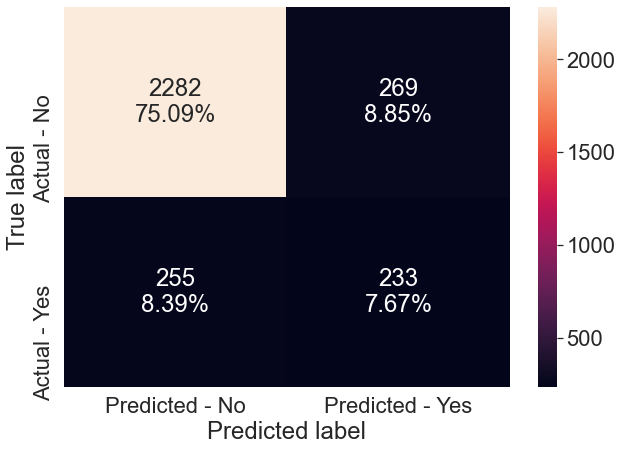

In [92]:
#Calculating different metrics
get_metrics_score(lr_under,X_train_un,X_test,y_train_un,y_test)

# creating confusion matrix
make_confusion_matrix(lr_over,y_test)

* Our model has improved from before, where it is not overfitting and generalizes well.
* The recall has drastically improved from the previous predictions, which this model produces really good recall with with the undersampled data.

## Model Comparison (For Logistic Regression)

In [94]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    
# defining list of models
models = [lr_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    
# defining list of model
models = [lr_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [96]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.885581,0.880224,0.460053,0.452869,0.727778,0.694969
1,Logistic Regression on Oversampled data,0.889561,0.827575,0.873592,0.477459,0.902414,0.464143
2,Logistic Regression-Regularized (Oversampled d...,0.712221,0.789075,0.580938,0.530738,0.787782,0.385991
3,Logistic Regression on Undersampled data,0.808604,0.801250,0.809482,0.803279,0.808063,0.435556


* From The comparisons we can see the best performance was given by the logistic regression with undersampled data. 

Now, we can move on to the bagging and boosting models.

## Bagging and Boosting

In [101]:
#Putting all models in one list for ease

# Appending pipelines for each model into the list
models = []

models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
               ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
               ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("Bagging", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

RF: 71.5534430790633
GBM: 80.68204652600663
ADB: 82.35296390756626
XGB: 85.863667980524
DTREE: 79.01537985933997
Bagging: 78.48674549810649


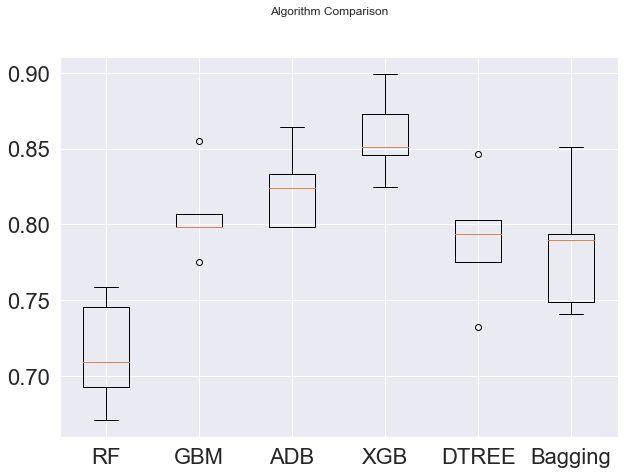

In [102]:
#Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()


* As we can see clearly the model with the best performance is the XGBoost followed by AdaBoost then GradientBoost

Let us see if hyperparameter tuning will give us better results for these models.

## HyperParameter Tuning with GridSearch and RandomSearch

In [105]:
#  Function to calculate different metric scores of the model - Accuracy, Recall and Precision

def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [106]:
## Function to create confusion matrix

def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## AdaBoost

### GridSearch

In [108]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 90} 
Score: 0.8595525156503594
Wall time: 14min 25s


In [109]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=70,
        learning_rate=0.2,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=70,
                                    random_state=1))])

Accuracy on training set :  0.9832110609480813
Accuracy on test set :  0.9621586048042119
Recall on training set :  0.9315188762071993
Recall on test set :  0.8627049180327869
Precision on training set :  0.9627949183303085
Precision on test set :  0.8976545842217484


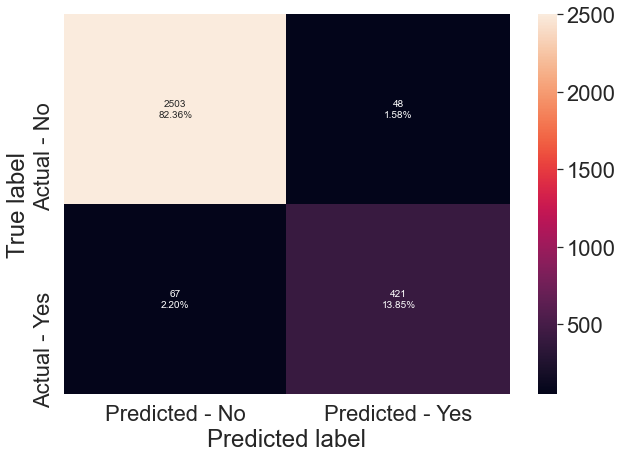

In [110]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

* This model does quite decently in terms of recall and does not overfit too much.

### Randomized Search

In [112]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8595525156503594:
Wall time: 4min 41s


In [113]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9889954853273137
Accuracy on test set :  0.9641329384666009
Recall on training set :  0.9622475856014048
Recall on test set :  0.8954918032786885
Precision on training set :  0.969053934571176
Precision on test set :  0.8828282828282829


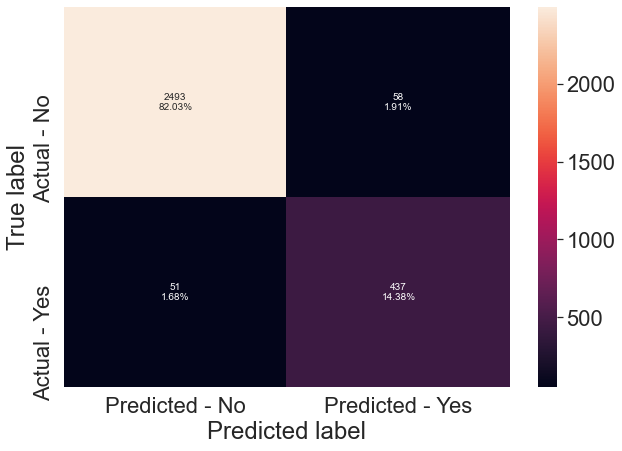

In [114]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

* There's a slight improvement from the previous model in terms of recall as we used randomized search which is good.

## Decision Tree

### GridSearch

In [117]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__max_leaf_nodes': 15, 'decisiontreeclassifier__min_impurity_decrease': 0.0001, 'decisiontreeclassifier__min_samples_leaf': 1} with CV score=0.7199049385578482:
Wall time: 10min 22s


In [118]:
# Creating new pipeline with best parameters
dt_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        random_state=1,
        max_depth=4,
        max_leaf_nodes=10,
        min_impurity_decrease=0.0001,
        min_samples_leaf=1,
        
    ),
)

# Fit the model on training data
dt_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                                        min_impurity_decrease=0.0001,
                                        random_state=1))])

Accuracy on training set :  0.9235327313769752
Accuracy on test set :  0.9131293188548865
Recall on training set :  0.7568042142230026
Recall on test set :  0.7520491803278688
Precision on training set :  0.7648624667258208
Precision on test set :  0.7196078431372549


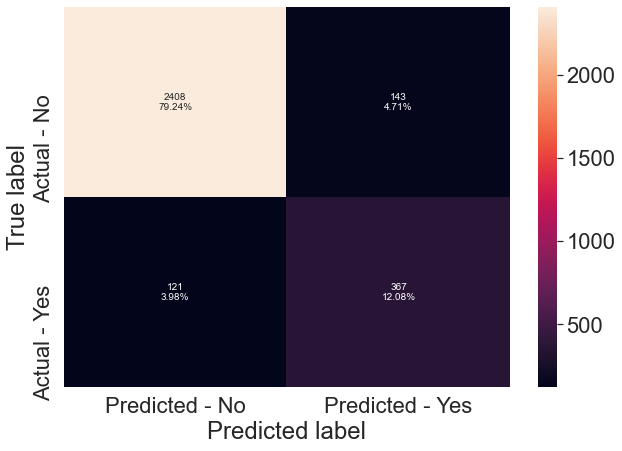

In [119]:
# Calculating different metrics
get_metrics_score(dt_tuned1)

# Creating confusion matrix
make_confusion_matrix(dt_tuned1, y_test)

* This model does well with generalization although our recall has dropped by quite an amount, regardless it is still quite decent in terms of performance.

### RandomizedSearch

In [120]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

#Parameter grid to pass in RandomSearchCV
param_grid={'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_leaf': 5, 'decisiontreeclassifier__min_impurity_decrease': 0.001, 'decisiontreeclassifier__max_leaf_nodes': 15, 'decisiontreeclassifier__max_depth': 18} with CV score=0.7199049385578482:
Wall time: 11 s


In [121]:
# Creating new pipeline with best parameters
dt_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "DT",
            DecisionTreeClassifier(
                min_samples_leaf=5,
                min_impurity_decrease=0.001,
                max_leaf_nodes=10,
                max_depth=26,
                random_state=1,
              
            ),
        ),
    ]
)
# Fit the model on training data
dt_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('DT',
                 DecisionTreeClassifier(max_depth=26, max_leaf_nodes=10,
                                        min_impurity_decrease=0.001,
                                        min_samples_leaf=5, random_state=1))])

Accuracy on training set :  0.9235327313769752
Accuracy on test set :  0.9131293188548865
Recall on training set :  0.7568042142230026
Recall on test set :  0.7520491803278688
Precision on training set :  0.7648624667258208
Precision on test set :  0.7196078431372549


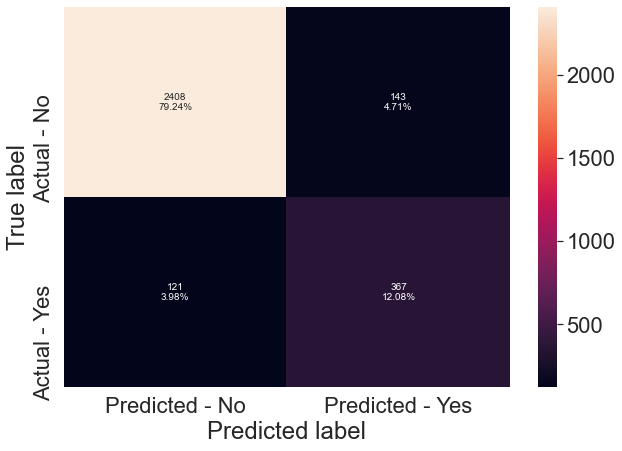

In [122]:
# Calculating different metrics
get_metrics_score(dt_tuned2)

# Creating confusion matrix
make_confusion_matrix(dt_tuned2, y_test)

* We don't see any significant improvement when we use randomized search for this rather than the grid search, the performance is relatively the same, although the randomzied search takes much less time.

## Bagging

### GridSearch

In [123]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'baggingclassifier__max_features': 0.9, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__n_estimators': 30} with CV score=0.8191398098771158:
Wall time: 4min 22s


In [124]:
# Creating new pipeline with best parameters
bc_tuned1 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        random_state=1,
        max_features=0.9,
        max_samples=0.9,
        n_estimators=40,
       
        
    ),
)

# Fit the model on training data
bc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9, max_samples=0.9,
                                   n_estimators=40, random_state=1))])

Accuracy on training set :  0.9995767494356659
Accuracy on test set :  0.9608423823626193
Recall on training set :  0.9982440737489026
Recall on test set :  0.8258196721311475
Precision on training set :  0.9991212653778558
Precision on test set :  0.9221967963386728


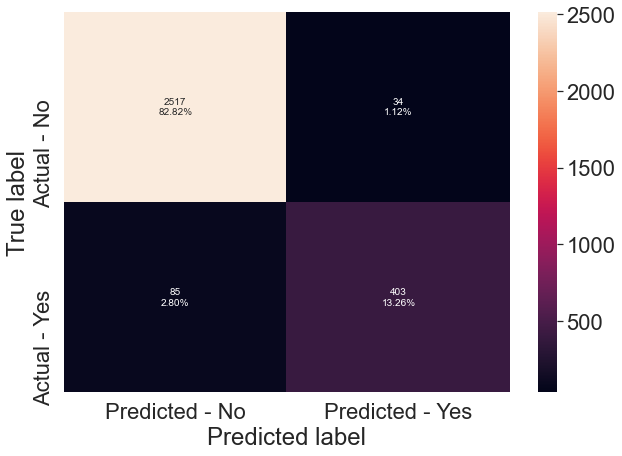

In [125]:
# Calculating different metrics
get_metrics_score(bc_tuned1)

# Creating confusion matrix
make_confusion_matrix(bc_tuned1, y_test)

* This model slightly overfits but we do see an improvement in recall from the previous model.

### RandomizedSearch

In [126]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

#Parameter grid to pass in RandomSearchCV
param_grid={'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'baggingclassifier__n_estimators': 30, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__max_features': 0.9} with CV score=0.8191398098771158:
Wall time: 2min 22s


In [127]:
# Creating new pipeline with best parameters
bc_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "Bagging",
            BaggingClassifier(
                n_estimators=40,
                max_samples=0.9,
                max_features=0.9,
                random_state=1,
              
            ),
        ),
    ]
)
# Fit the model on training data
bc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Bagging',
                 BaggingClassifier(max_features=0.9, max_samples=0.9,
                                   n_estimators=40, random_state=1))])

Accuracy on training set :  0.9995767494356659
Accuracy on test set :  0.9608423823626193
Recall on training set :  0.9982440737489026
Recall on test set :  0.8258196721311475
Precision on training set :  0.9991212653778558
Precision on test set :  0.9221967963386728


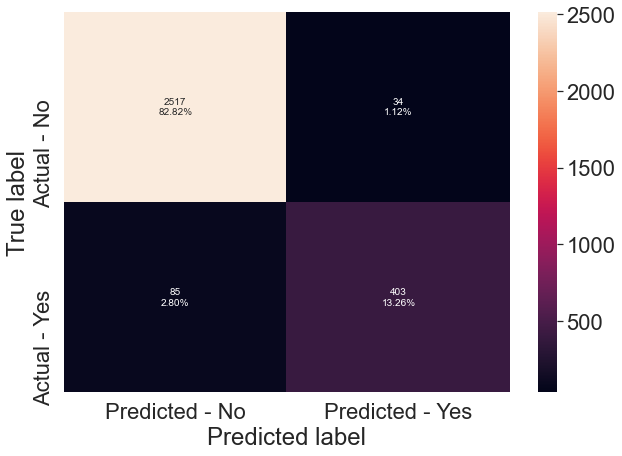

In [128]:
# Calculating different metrics
get_metrics_score(bc_tuned2)

# Creating confusion matrix
make_confusion_matrix(bc_tuned2, y_test)

* The model performs relatively the same with when we used grid search, once again it just takes much quicker to finish running

**Due to time complexity and how long the models might take to run, I shall only do randomized search for both random forest and XGBoost**

## Random Forest (RandomizedSearch)

In [129]:
%%time 

#Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True))

#Parameter grid to pass in RandomizedSearchCV
param_grid = {
     'randomforestclassifier__max_depth': list(np.arange(5,30,5)),
                'randomforestclassifier__max_features': ['sqrt','log2',None],
                'randomforestclassifier__min_samples_leaf': np.arange(1,15,5),
                'randomforestclassifier__min_samples_split': np.arange(2, 20, 5),
                'randomforestclassifier__n_estimators': np.arange(10,110,10)

}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 80, 'randomforestclassifier__min_samples_split': 12, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': None, 'randomforestclassifier__max_depth': 25} with CV score=0.8366991266713038:
Wall time: 4min 7s


In [130]:
# Creating new pipeline with best parameters
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=1,
        max_depth=20,
        max_features=None,
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=30,
        oob_score=True,
        bootstrap=True
    ),
)

# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, max_features=None,
                                        n_estimators=30, oob_score=True,
                                        random_state=1))])

Accuracy on training set :  1.0
Accuracy on test set :  0.9598552155314248
Recall on training set :  1.0
Recall on test set :  0.8504098360655737
Precision on training set :  1.0
Precision on test set :  0.8943965517241379


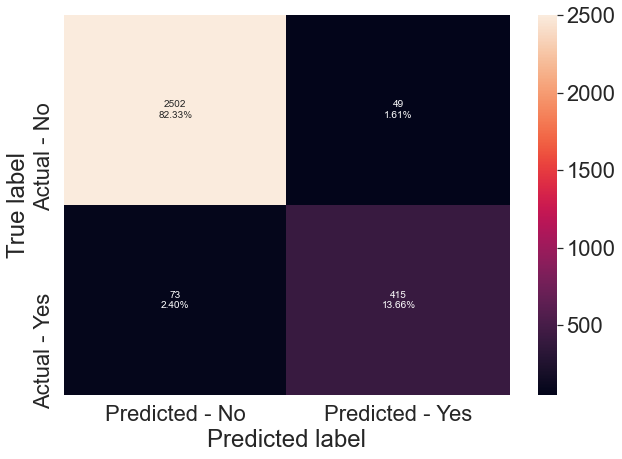

In [131]:
# Calculating different metrics
get_metrics_score(rf_tuned2)

# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

* This model overfits slightly, but we see very decent performance across all metrics

## XGBoost(RandomizedSearch)

In [133]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in RandomSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.9, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 1} with CV score=0.9438171419738774:
Wall time: 7min 33s


In [134]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=200,
                scale_pos_weight=10,
                learning_rate=0.01,
                gamma=1,
                subsample=0.9,
                eval_metric='logloss',
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.932420993227991
Accuracy on test set :  0.9068772622573215
Recall on training set :  0.9947322212467077
Recall on test set :  0.9569672131147541
Precision on training set :  0.7054794520547946
Precision on test set :  0.6406035665294925


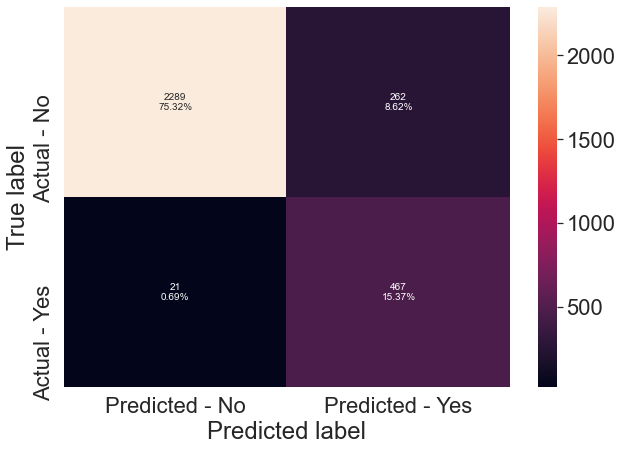

In [135]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

* This model gives us our highest recall, and generalizes really well, while also giving good accuracy and decent precision too.

# Comparing All Models' Performances

In [137]:
# defining list of models
models = [abc_tuned1, abc_tuned2, rf_tuned2, xgb_tuned2, dt_tuned1, dt_tuned2, bc_tuned1, bc_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [142]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "ADA Boost with GridSearchCV",
            "ADA Boost with RandomizedSearchCV",
            "Random Forest with RandomizedSearchCV",
            "XGBoost with RandomizedSearchCV",
            "Decision Tree with GridSearchCV",
            "Decision Tree with RandomizedSearchCV",
            "Bagging Classifier with GridSearchCV",
            "Bagging Classfier with RandomizedSearchCV"
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
3,XGBoost with RandomizedSearchCV,0.932421,0.906877,0.994732,0.956967,0.705479,0.640604
1,ADA Boost with RandomizedSearchCV,0.988995,0.964133,0.962248,0.895492,0.969054,0.882828
0,ADA Boost with GridSearchCV,0.983211,0.962159,0.931519,0.862705,0.962795,0.897655
2,Random Forest with RandomizedSearchCV,1.000000,0.959855,1.000000,0.850410,1.000000,0.894397
6,Bagging Classifier with GridSearchCV,0.999577,0.960842,0.998244,0.825820,0.999121,0.922197
7,Bagging Classfier with RandomizedSearchCV,0.999577,0.960842,0.998244,0.825820,0.999121,0.922197
4,Decision Tree with GridSearchCV,0.923533,0.913129,0.756804,0.752049,0.764862,0.719608
5,Decision Tree with RandomizedSearchCV,0.923533,0.913129,0.756804,0.752049,0.764862,0.719608


* XGBoost with randomized search gives us our highest performance in terms of recall.
* The next best models would be AdaBoost with randomized search and AdaBoost with grid search.
* If we had performed XGBoost with Grid Search, there's a case where we could say it would probably give us the highest recall out of all models.
* Generally all models executed with randomized search ran much quicker than their grid search counterparts.

## Feature Importance for XGBoost with RandomizedSearch

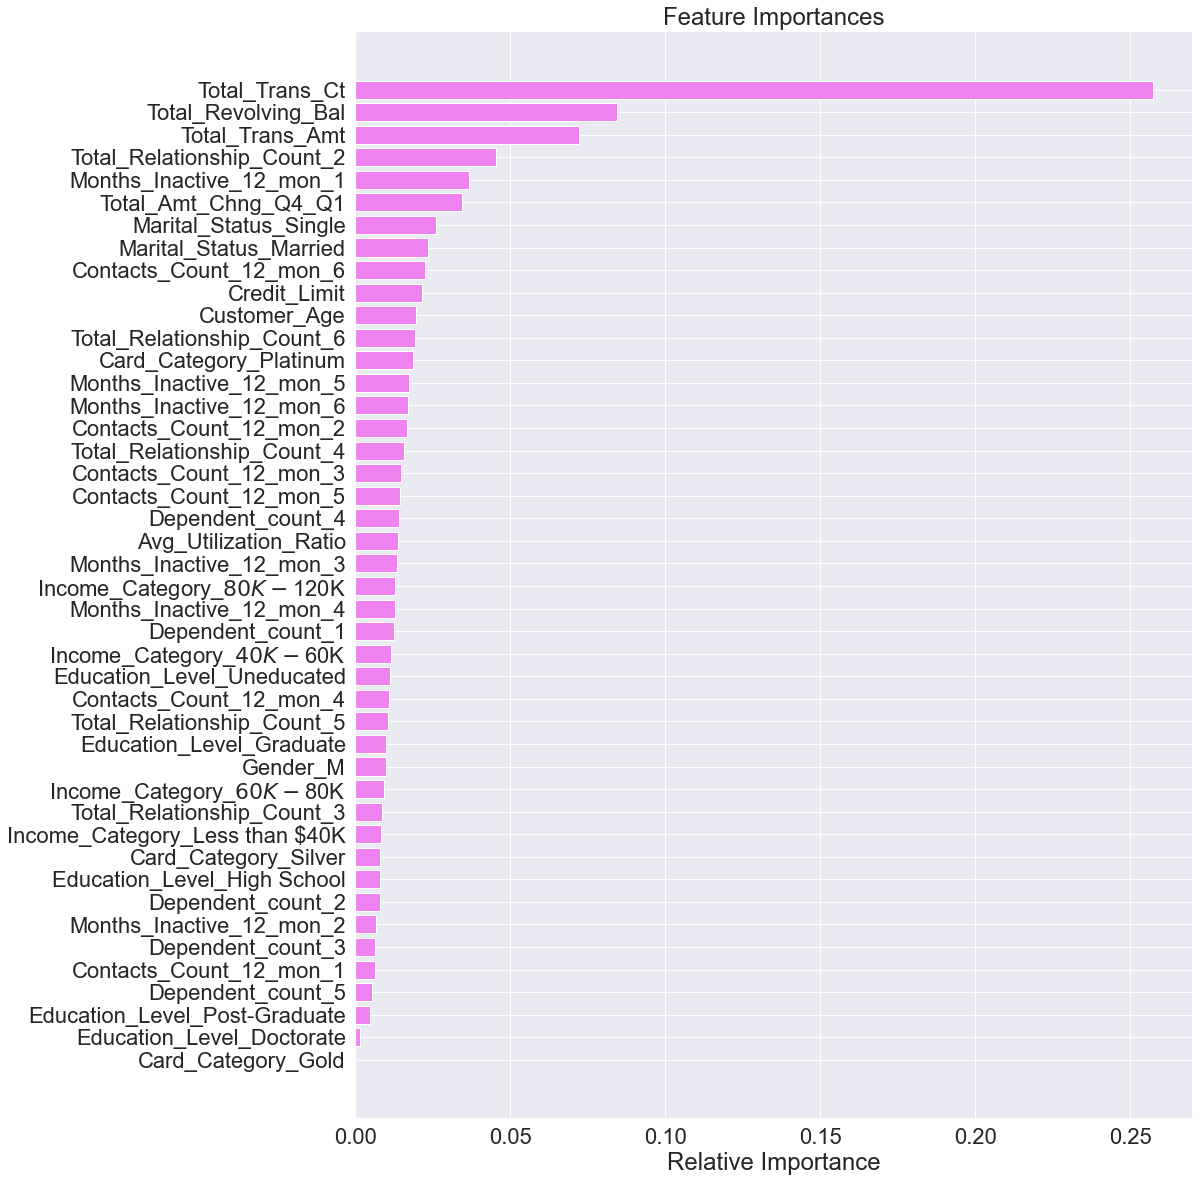

In [145]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features are `Total_Trans_Ct`, `Total_Revolving_Bal` and `Total_Trans_Amt`.

# Insights and Recommendations

* With our model, we can predicate whether a customer will stop using card services to an accuracy of 95%, which is really good.
* Looking at the most important features to our model, the bank should apporach customers with low transaction counts and target them, also customers with low revolving balance should be looked at.
* Customers with low transaction count too should also be paid attention. Incentives could be given to try to increase their trnasaction count.
* Customers who own platinum cards should be looked at also, maybe offering more benefits for that particular card grade or incentivizing them to upgrade/downgrade to other cards that suit their needs. Those who own 2 products are also quite likely to attrite so they should be kept under close watch as well.
* Customers who own post graduate or doctorate degrees should be investigated to find out what their needs are in terms of the card services so as to improve and tailor their experience accordingly. 